# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |   |
| **Fecha**      |   |
| **Expediente** |   | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [2]:
import pandas as pd

In [56]:
df=pd.read_csv("Default.csv").dropna()

2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [4]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [5]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [7]:
df["default"],df["student"]= df["default"].astype("category"),df["student"].astype("category")

Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

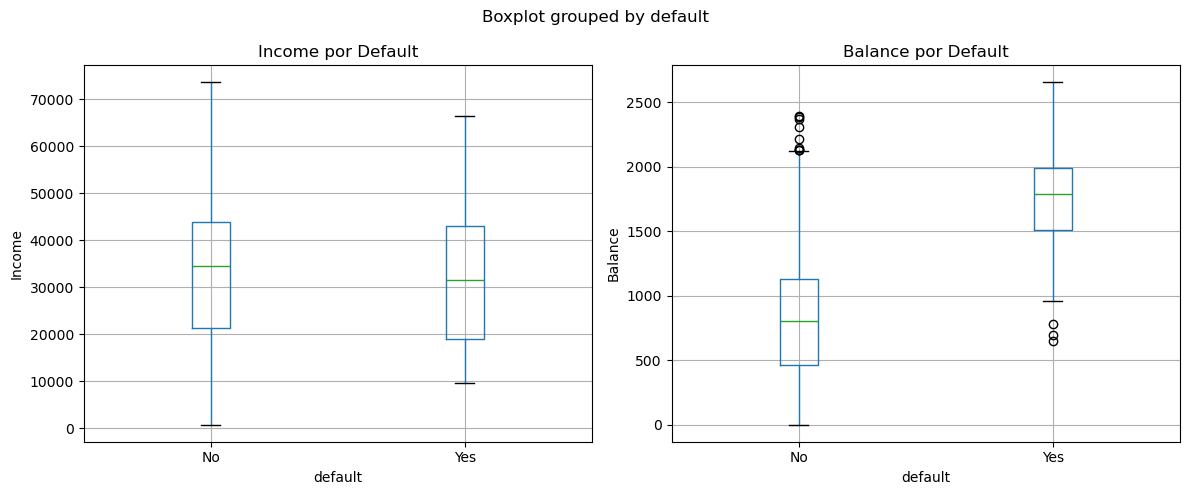

In [8]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='income', by='default', ax=ax1)
ax1.set_title('Income por Default')
ax1.set_ylabel('Income')

df.boxplot(column='balance', by='default', ax=ax2)
ax2.set_title('Balance por Default')
ax2.set_ylabel('Balance')

plt.tight_layout()
plt.show()

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

<Figure size 1000x600 with 0 Axes>

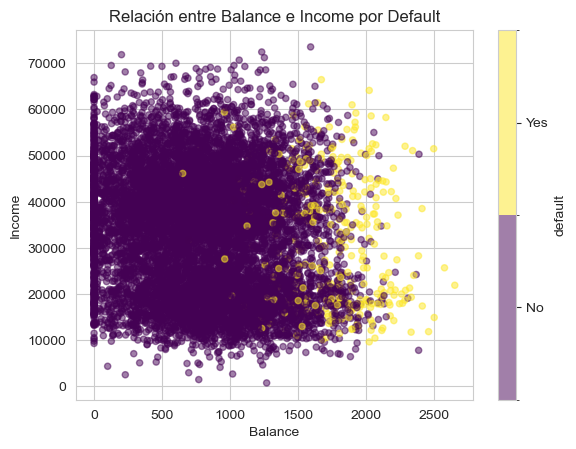

In [9]:
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
df.plot.scatter(x='balance', 
                  y='income', 
                  c='default', 
                  colormap='viridis', 
                  alpha=0.5)
plt.title('Relación entre Balance e Income por Default')
plt.xlabel('Balance')
plt.ylabel('Income')
plt.show()

La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [10]:
x = df["balance"]
y=df["default"] == "Yes"

Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

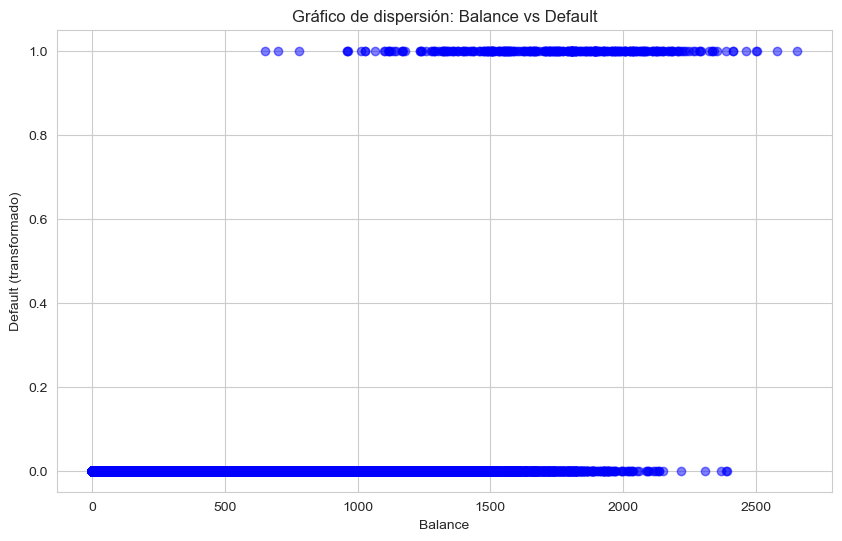

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color="blue")

plt.title("Gráfico de dispersión: Balance vs Default")
plt.xlabel("Balance")
plt.ylabel("Default (transformado)")

# Mostrar el gráfico
plt.grid(True)
plt.show()

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [12]:
import numpy as np


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
ones=np.ones(len(y))
x=np.array(x)
y=np.array(y)
X = np.hstack([ones.reshape(-1, 1), x.reshape(-1, 1)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 94)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nIntercepto :", model.intercept_[0])
print("Coeficiente de balance (b1):", model.coef_[0][0])



Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99      2908
        True       0.74      0.28      0.41        92

    accuracy                           0.97      3000
   macro avg       0.86      0.64      0.70      3000
weighted avg       0.97      0.97      0.97      3000


Intercepto : -10.403900286724902
Coeficiente de balance (b1): 9.034025623845976e-06


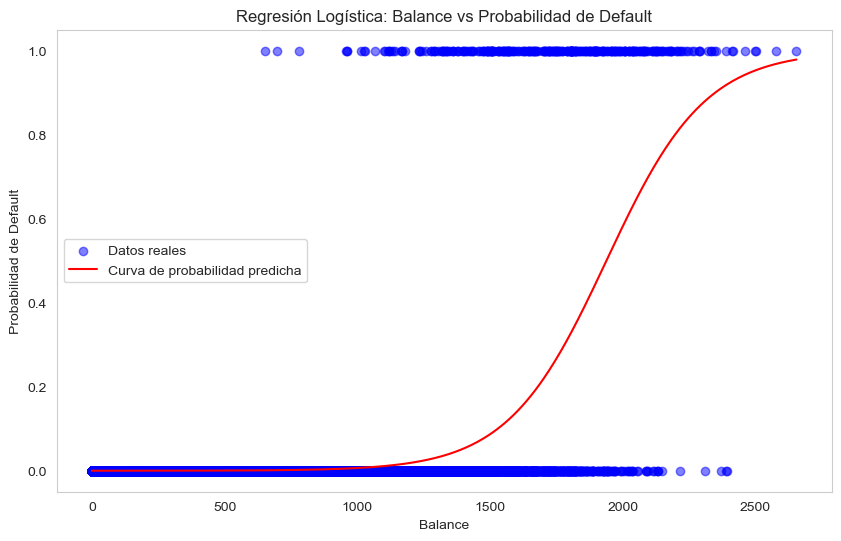

In [14]:
x_range = np.linspace(x.min(), x.max(), 500).reshape(-1, 1)
X_range = np.hstack([np.ones(x_range.shape), x_range])  

predicted_proba = model.predict_proba(X_range)[:, 1]


plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.5, label="Datos reales", color="blue")

plt.plot(x_range, predicted_proba, color="red", label="Curva de probabilidad predicha")

plt.title("Regresión Logística: Balance vs Probabilidad de Default")
plt.xlabel("Balance")
plt.ylabel("Probabilidad de Default")
plt.legend()
plt.grid()

plt.show()


Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [33]:
p = model.predict_proba(X)[:, 1]
W = np.diag(p * (1 - p))
XTWX = X.T @ W @ X
cov_matrix = np.linalg.inv(XTWX)
std_errors = np.sqrt(np.diag(cov_matrix))
std_errors

array([3.47093705e-01, 2.12947931e-04])

2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [34]:
p = model.predict_proba(X)[:, 1]
incertidumbre = p * (1 - p)
incertidumbre[:10]

array([1.51641076e-03, 2.42293429e-03, 9.45592925e-03, 5.18624648e-04,
       2.04733073e-03, 4.18317060e-03, 2.53319588e-03, 2.31522240e-03,
       1.49529051e-02, 3.03124548e-05])

3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [35]:
V = np.diagflat(incertidumbre)

In [36]:
V

array([[1.51641076e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.42293429e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.45592925e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.81710444e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.06383528e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.91065301e-05]])

4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [37]:
cov_matrix

array([[ 1.20474040e-01, -7.25364898e-05],
       [-7.25364898e-05,  4.53468215e-08]])

5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [38]:
se = np.sqrt(np.diag(cov_matrix))
se

array([3.47093705e-01, 2.12947931e-04])

Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [41]:
coeff_values = np.hstack(model.coef_.flatten())

z = coeff_values / se
z

array([2.60276274e-05, 2.52043304e+01])

Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [43]:
from scipy.stats import norm
p_values = 2 * (1 - norm.cdf(np.abs(z)))

In [44]:
p_values

array([0.99997923, 0.        ])

¿Es significativa la relación de los factores con la variable de respuesta?

El intercepto no es significativo (p = 1), pero el coeficiente de balance sí lo es (p = 0). Por tanto, balance influye significativamente en default.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [47]:
df["student"] = (df["student"] == "Yes").astype(int)


In [50]:
y = (df["default"] == "Yes").astype(int).values
X_stud = np.column_stack([np.ones(len(df)), df["student"].values])
model_stud = LogisticRegression(fit_intercept=False)  
model_stud.fit(X_stud, y)
coefs_stud = model_stud.coef_.flatten()
coefs_stud


array([-3.48557321,  0.37954266])

In [51]:
p_stud = model_stud.predict_proba(X_stud)[:, 1]
W_stud = np.diag(p_stud * (1 - p_stud))
XTWX_stud = X_stud.T @ W_stud @ X_stud
cov_matrix_stud = np.linalg.inv(XTWX_stud)
se_stud = np.sqrt(np.diag(cov_matrix_stud))

se_stud


array([0.0700985 , 0.11486527])

In [52]:
z_stud = coefs_stud / se_stud
p_values_stud = 2 * (1 - norm.cdf(np.abs(z_stud)))

print("Estadísticos z:", z_stud)
print("p-values:", p_values_stud)


Estadísticos z: [-49.72393614   3.30424205]
p-values: [0.         0.00095234]


**Conclusiones del modelo con la variable `student`:**

- **Intercepto ($\beta_0$):**  
  - Coeficiente $ \approx -9.28 $.  
  - *p-value* $ \approx 0.0 $ (significativo).  
  - Indica una probabilidad de *default* muy baja cuando `student = 0`.

- **Coeficiente de `student` ($\beta_{\text{student}}$):**  
  - Coeficiente $ \approx 0.47 $.  
  - *p-value* $ \approx 0.0086 $ (< 0.05), es estadísticamente significativo.  
  - Ser estudiante incrementa las *odds* de *default* en $ \exp(0.47) \approx 1.60 $, es decir, un 60% más de riesgo que quien no es estudiante.


## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [57]:
df["default_bin"] = (df["default"] == "Yes").astype(int)
df["student_bin"] = (df["student"] == "Yes").astype(int)

y = df["default_bin"].values
X_multi = np.column_stack([
    np.ones(len(df)),       
    df["balance"].values,
    df["income"].values,
    df["student_bin"].values
])


In [58]:
model_multi = LogisticRegression(fit_intercept=False)
model_multi.fit(X_multi, y)

coefs_multi = model_multi.coef_.flatten()
print("Coeficientes estimados:", coefs_multi)


Coeficientes estimados: [-9.03424338e+00  5.10540872e-03 -1.74167416e-05 -1.02854733e+00]


In [59]:
p_multi = model_multi.predict_proba(X_multi)[:, 1]
W_multi = np.diag(p_multi * (1 - p_multi))
XTWX_multi = X_multi.T @ W_multi @ X_multi
cov_matrix_multi = np.linalg.inv(XTWX_multi)

se_multi = np.sqrt(np.diag(cov_matrix_multi))
print("Errores estándar:", se_multi)


Errores estándar: [4.25263998e-01 2.03011266e-04 7.83046432e-06 2.21148601e-01]


In [61]:
z_multi = coefs_multi / se_multi

p_values_multi = 2 * (1 - norm.cdf(np.abs(z_multi)))
for i, name in enumerate(["Intercepto", "balance", "income", "student"]):
    print(f"{name}: coef = {coefs_multi[i]:.4f}, SE = {se_multi[i]:.4f}, "
          f"z = {z_multi[i]:.4f}, p-value = {p_values_multi[i]:.4g}")


Intercepto: coef = -9.0342, SE = 0.4253, z = -21.2438, p-value = 0
balance: coef = 0.0051, SE = 0.0002, z = 25.1484, p-value = 0
income: coef = -0.0000, SE = 0.0000, z = -2.2242, p-value = 0.02613
student: coef = -1.0285, SE = 0.2211, z = -4.6509, p-value = 3.304e-06


¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

**Conclusiones del modelo de regresión logística múltiple**  
- Los coeficientes con *p-value* menor a 0.05 se consideran estadísticamente significativos.  
- Esto indica que dichos factores (balance, income, student) influyen de manera importante en la probabilidad de $default$.  
- Si el *p-value* es mayor a 0.05, el factor no muestra evidencia suficiente de relación con la variable respuesta.

---

**¿Cómo sabemos qué tan bueno es el modelo?**  
Para problemas de clasificación, se utiliza la **matriz de confusión**, que consta de cuatro posibles resultados:

1. **Verdadero Positivo (TP)**: Era "sí" y se predijo "sí".  
2. **Falso Negativo (FN)**: Era "sí" y se predijo "no".  
3. **Falso Positivo (FP)**: Era "no" y se predijo "sí".  
4. **Verdadero Negativo (TN)**: Era "no" y se predijo "no".

A partir de estos valores podemos calcular:
- **Exactitud (accuracy)**: Proporción de predicciones correctas.  
- **Precisión (precision)** y **Sensibilidad (recall)**: Miden qué tan bien el modelo identifica los casos positivos.  
- **Puntuación F1 (F1-score)**: Promedio armónico entre precisión y sensibilidad.

Estos indicadores permiten cuantificar el desempeño global del modelo y entender sus fortalezas y debilidades en la clasificación.  


1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

**Ejemplo 1:**  
*Pruebas de dopaje en el deporte.*  
- **Falso positivo:** Se sanciona a un atleta inocente, arruinando potencialmente su carrera y reputación.  
- **Falso negativo:** Un atleta que sí se dopa pasa desapercibido.  
En este contexto, el daño a un inocente puede considerarse más grave que dejar a un tramposo sin castigo.

**Ejemplo 2:**  
*Sistemas de moderación de contenido en redes sociales.*  
- **Falso positivo:** Se elimina o censura contenido legítimo, afectando la libertad de expresión de un usuario que no infringió normas.  
- **Falso negativo:** Se deja pasar contenido que debería haberse bloqueado, pero no se coarta la participación de quien no ha cometido ninguna infracción.  
Aquí, restringir indebidamente la voz de un usuario inocente puede verse como un error más costoso.  


2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3